---

# Importing Libraries

In [1]:
# Basic packages
from scipy.stats import chi2_contingency
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as spy
from scipy import stats
import math
%matplotlib inline

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

---

# Data ingestion 

In [3]:
# Load dataset
data = pd.read_csv('CardioEqptSales.csv')

---

**Convert Pandas Objects to Category type**

In [4]:
# Convert variables with "object" type to "category" type
for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = data[i].astype("category") 

# Confirm if there no variables with "object" type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


**Create independent sub-lists to separate Numerical and Categorical variables for EDA**

In [5]:
# Select numeric variables
numeric_columns = data.select_dtypes(include=['int', 'float']).columns.tolist()
# Select categorical variables
categorical_columns = data.select_dtypes(include=['category']).columns.tolist()

---

# Feature Engineering

The Age and Education variables can be categorized to improve data analysis

**Categorizing Age**

In [6]:
# Define the age bins and labels
age_bins = [18, 24, 34, 44, 50]  # Define your age range boundaries
age_labels = ['YoungAdults', 'EarlyAdults', 'Adults', 'SeniorAdults']

# Create a new column with age categories
data['AgeGroup'] = pd.cut(
    data['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

**Categorizing Education**

In [7]:
# Define the Education bins and labels
education_bins = [12, 13, 15, 17, float("inf")]  # Define your education years range boundaries
education_labels = ['HighSchool', 'AssocDegree', 'Undergraduate', 'Graduate']

# Create a new column with Education categories
data['EducationLevel'] = pd.cut(
    data['Education'], bins=education_bins, labels=education_labels, include_lowest=True)

---

# Exploratory Data Analysis

## Univariate Analysis

### Numerical Variables

**Histogram Overview**

In [8]:
def histogram_overview(data):
    """
    Histogram Overview function
    
    This function below generates a subplots of  `histogram plots` & 
    showing the `distribution of the numerical varible input`
    
    * Generates subplots for each numerical variable in a three column structure.
    * The function takes the Pandas dataframe as the input
    * The function selects the numerical variables from the applied dataframe.
    * It generates a vertical `line` to indicate the `mean`, `median` and `mode` on the histogram
    * `sns.set_style` - sets the Seaborn theme
    * `subplot_nrows` - calculated number of subplot rows
    * `subplot_ncols` - configures the three column structure subplots
    * `figsize` - indicates the size of the plot
    * `sns.reset_defaults()` - resets Seaborn themes and settings to default
    
    """
    num_vars = data.select_dtypes(include=np.number).columns.to_list()
    plt.figure(figsize=(10, 10))
    for i in range(len(num_vars)):
        # Set seaborn theme
        sns.set_style("darkgrid")
        # Subplot no of columns
        subplot_ncols = math.ceil(np.sqrt(len(num_vars)))
        # Subplot no of rows
        subplot_nrows = subplot_ncols

        plt.subplot(subplot_nrows, subplot_ncols, i + 1)

        plt.hist(data[num_vars[i]])
        #Plot vertical line for the mean
        plt.axvline(data[num_vars[i]].mean(),
                    color='green',
                    linestyle='--',
                    label="mean")
        #Plot vertical line for the median
        plt.axvline(data[num_vars[i]].median(),
                    color='red',
                    linestyle='-',
                    label="median")
        #Plot vertical line for the mode
        plt.axvline(data[num_vars[i]].mode()[0],
                    color='black',
                    linestyle='-',
                    label="mode")
        plt.legend()
        plt.tight_layout()
        plt.title(num_vars[i], fontsize=16)
    plt.show()
    # Reset seaborn theme
    sns.reset_defaults()

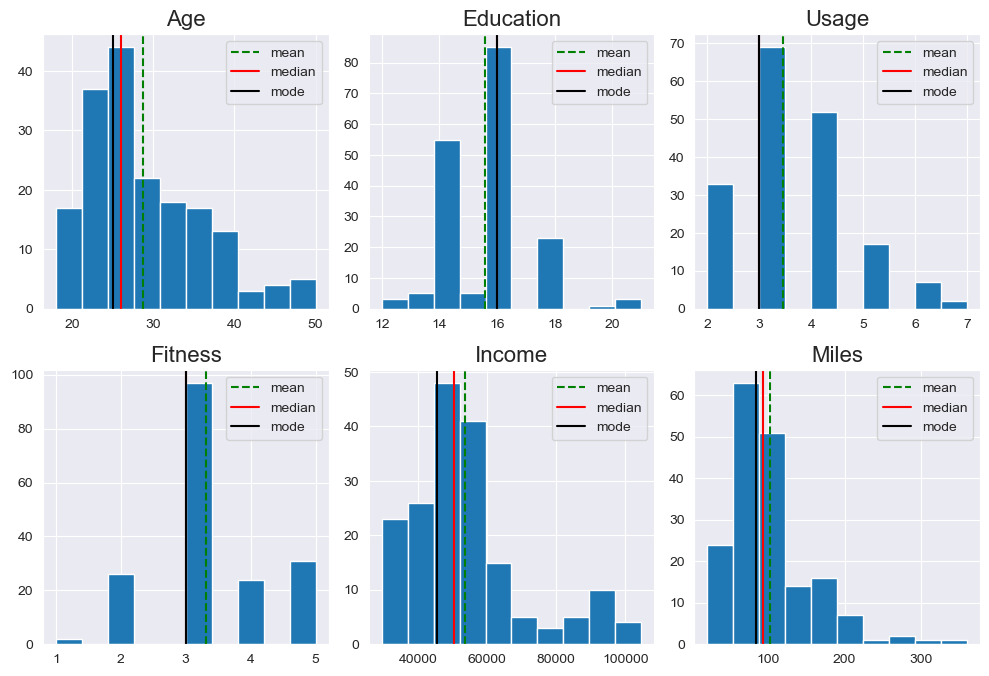

In [9]:
histogram_overview(data)

**Boxplot overview**

In [10]:
def boxplot_overview(data):
    """
    This function below generates a subplots of `box plots` &
    showing the `distribution of the numerical variable input with outliers`.

    * Generates subplots for each numerical variable in a three column structure.
    * The function takes the Pandas dataframe as the input
    * The function selects the numerical variables from the applied dataframe.
    * It shows the `mean` in the boxplot.
    * `sns.set_style` - sets the Seaborn theme
    * `subplot_nrows` - calculated number of subplot rows
    * `subplot_ncols` - configures the three column structure subplots
    * `figsize` - indicates the size of the plot
    * `sns.reset_defaults()` - resets Seaborn themes and settings to default
    """

    num_vars = data.select_dtypes(include=np.number).columns.to_list()
    plt.figure(figsize=(10, 10))
    for i in range(len(num_vars)):
        # Set seaborn theme
        sns.set_style("darkgrid")
        # Subplot no of columns
        subplot_ncols = math.ceil(np.sqrt(len(num_vars)) )  
        # Subplot no of rows
        subplot_nrows = math.ceil(len(num_vars) / subplot_ncols)  
          
        plt.subplot(subplot_nrows, subplot_ncols, i + 1)
        sns.boxplot(y=data[num_vars[i]], width=0.3, showmeans=True)
        plt.tight_layout()
        plt.title(num_vars[i], fontsize=16)
    plt.show()
    # Reset seaborn theme
    sns.reset_defaults()

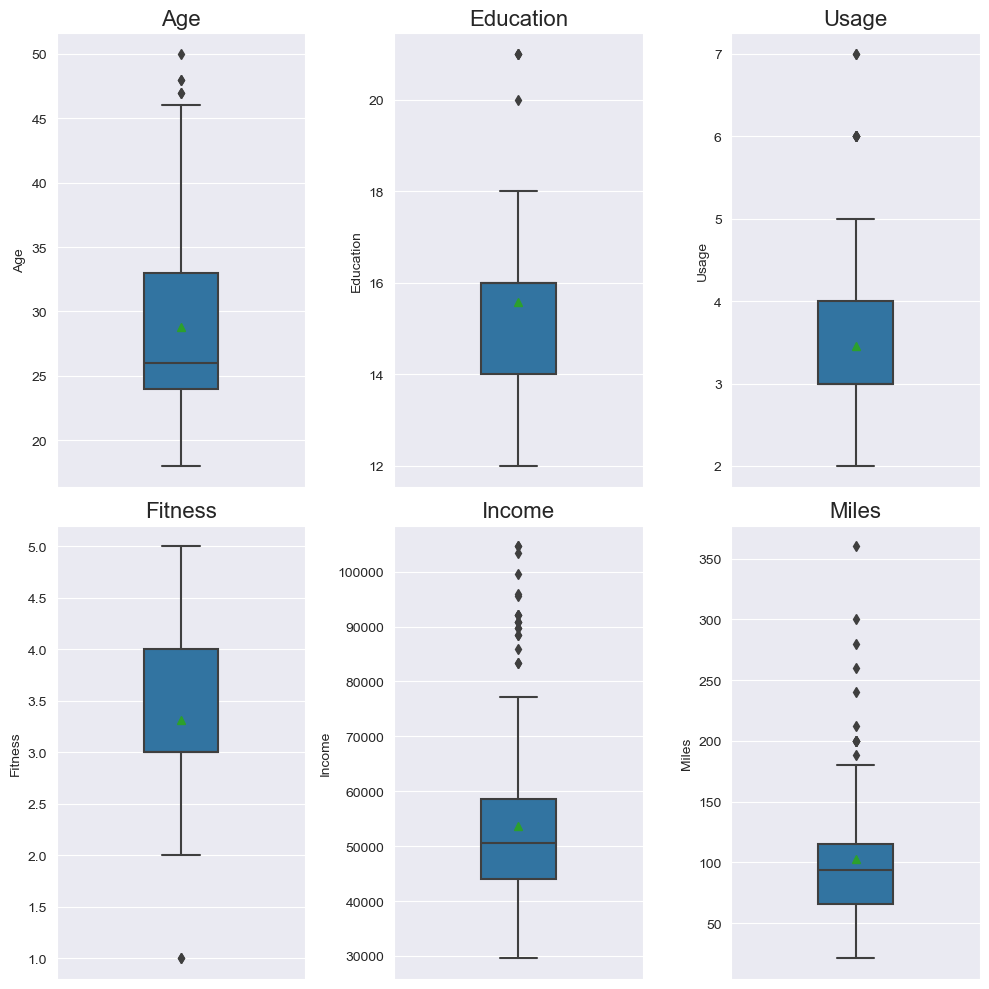

In [11]:
boxplot_overview(data)

### Categorical Variables

In [12]:
def bar_chart(data):
    """
    This function below generates a `bar chart` showing
    the `distribution of the categorical varible input`.
    * The function also `generates an image file` of the plot.
    * The function takes the Pandas series as the input.
    * It `computes the frequency of each unique element` and 
      displays the distribution of the elements to in horizontal bars.
    * The `percentage of each bar` is also calculated and placed to 
      the right end of each bar.
    * `sns.despine()` - removes the upper and right border of the chart
    * For each horizontal bar the width is calculated as a percentage of
      the entire quanta of datapoints.
    * The percentage is annotated to the each bar by plotting the cardinal locations.

    """

    # Create a horizontal count plot while sorting variables in descending order
    g = sns.countplot(y=data, order = data.astype(str).value_counts().index)
    # Remove the top and right spines from plot
    sns.despine()
    # length of the column
    col_length = len(data)
    for p in g.patches:
        # percentage of each class of the category
        percentage = '{:.1f}%'.format(100 * p.get_width()/col_length)
        # width of the plot
        x = p.get_x() + p.get_width() + 0.02
        # height of the plot
        y = p.get_y() + p.get_height()/2
        # annotate the percentage
        g.annotate(percentage, (x, y), size=12)
        plt.title("Distribution of {}".format(
            data.name), loc="center", fontsize=22)
    plt.show()
    # Line separator
    print('--'*55)

In [13]:
data.select_dtypes(exclude = np.number).columns.to_list()


['Product', 'Gender', 'MaritalStatus', 'AgeGroup', 'EducationLevel']

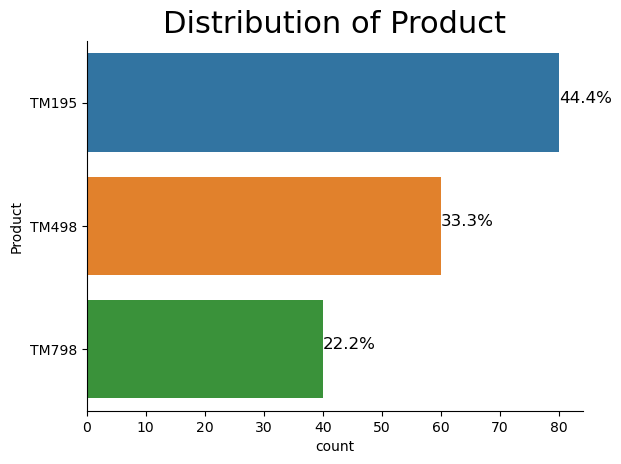

--------------------------------------------------------------------------------------------------------------


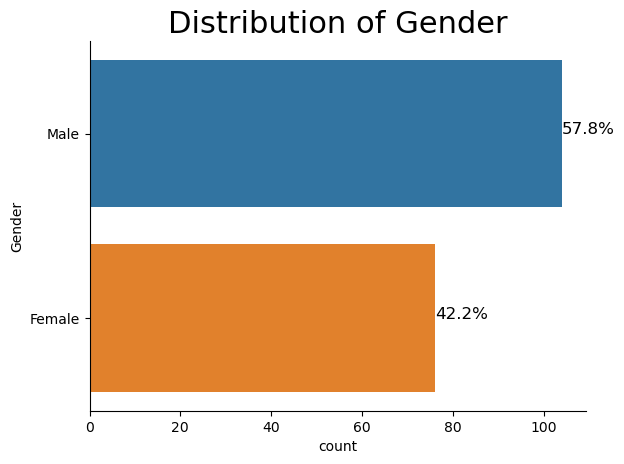

--------------------------------------------------------------------------------------------------------------


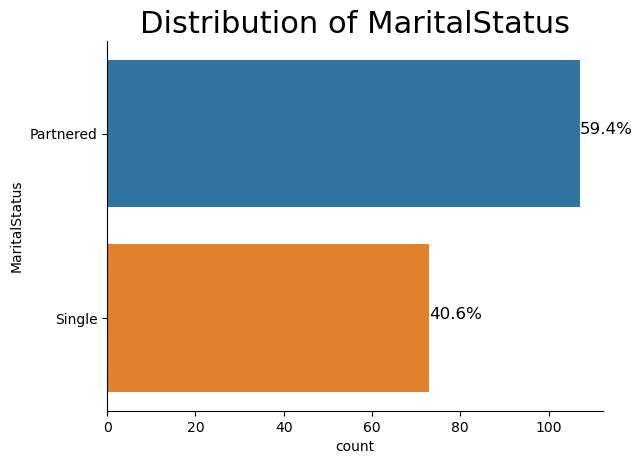

--------------------------------------------------------------------------------------------------------------


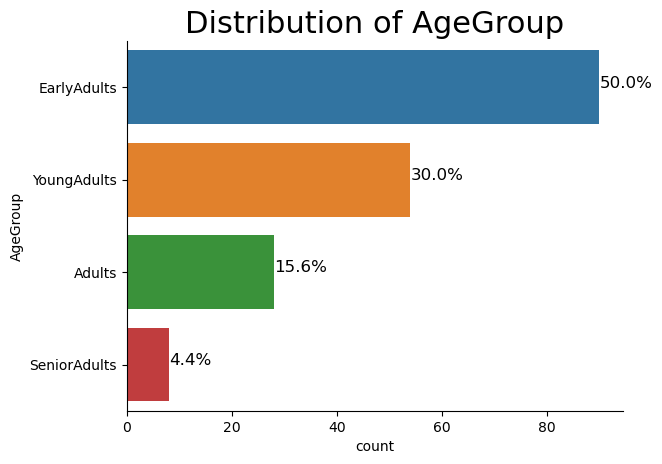

--------------------------------------------------------------------------------------------------------------


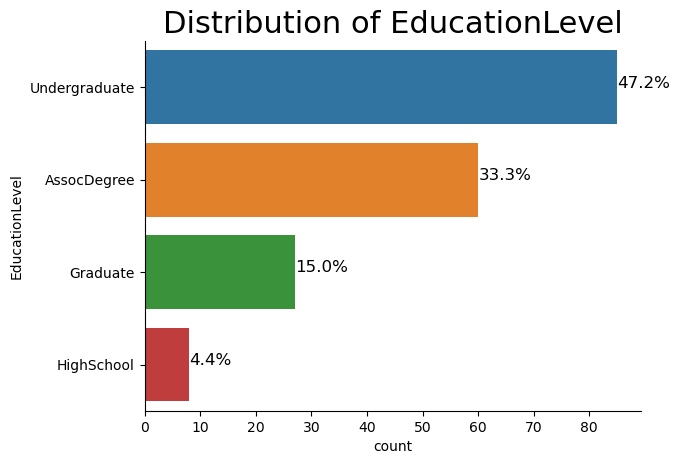

--------------------------------------------------------------------------------------------------------------


In [14]:
for each_var in data.select_dtypes(exclude = np.number).columns.to_list():
    plt.figure()
    bar_chart(data=data[each_var])

---

## Bivariate Analysis

### Heat Map

Create sub-dataframe removing binned numerical variables

In [15]:
data_binned = data.drop(columns=["Age", 'Education'])

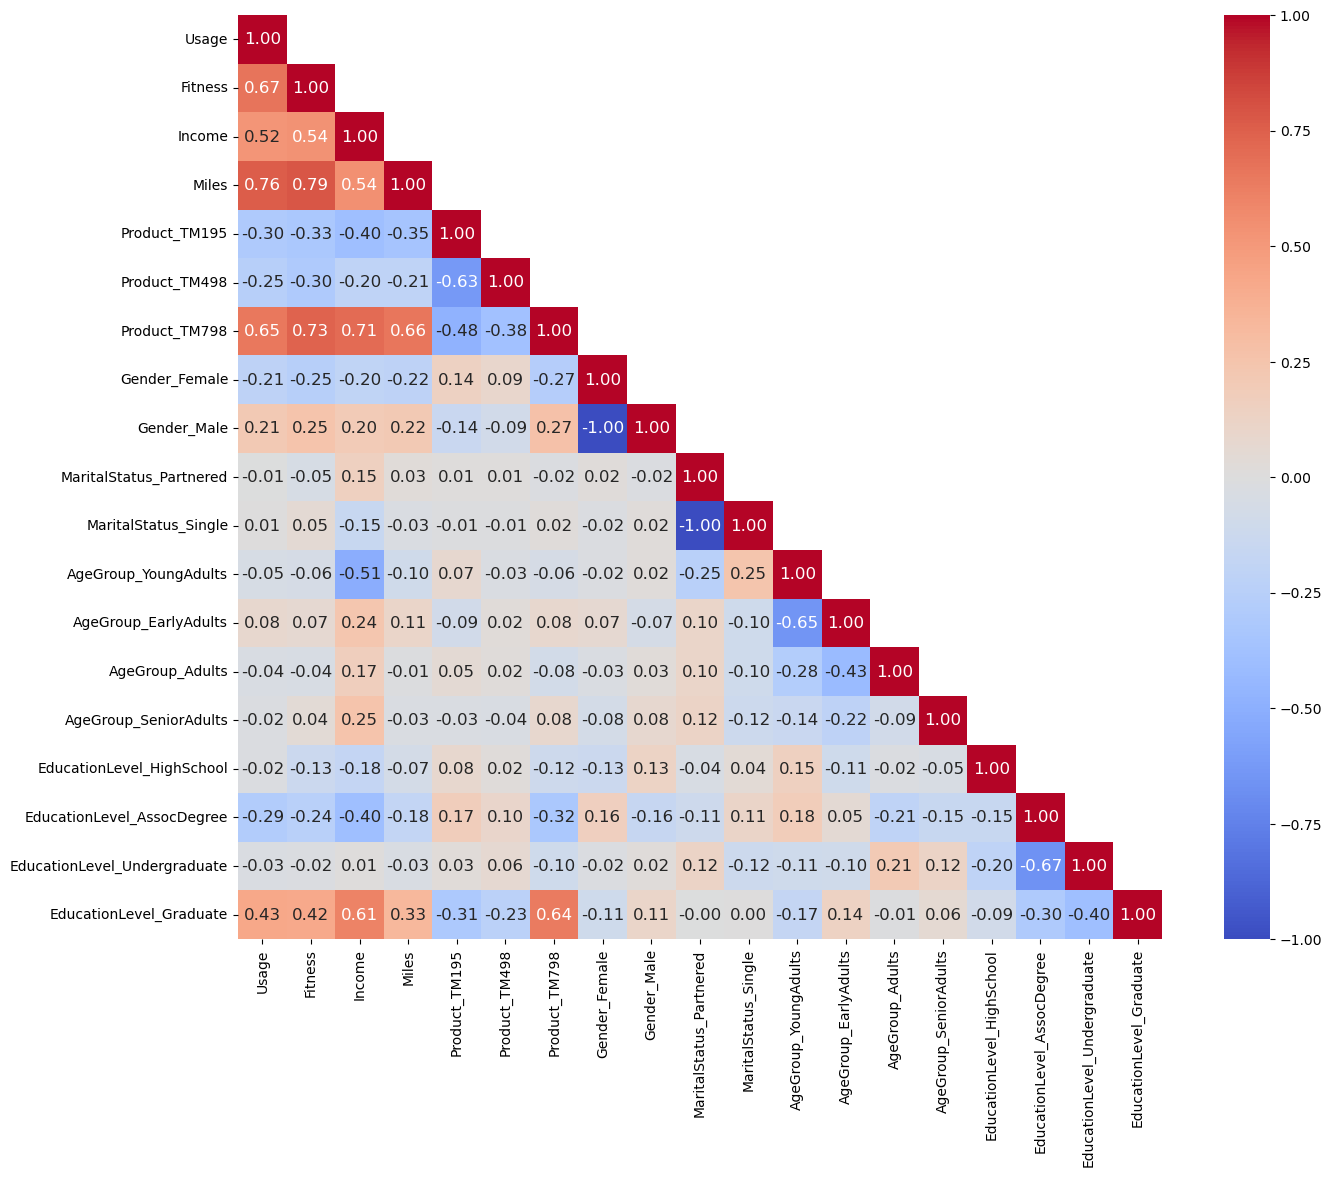

In [16]:
onehot = pd.get_dummies(data_binned,
                        columns=data_binned.select_dtypes(include=['category']).columns.tolist())
oh_corr = onehot.corr()

annot_kws = {"fontsize": 12}

symmetric_matrix = (oh_corr + oh_corr.T) / 2

# Create a mask for the upper half of the matrix
mask = np.triu(np.ones_like(symmetric_matrix), k=1)

plt.figure(figsize=(16, 12))
sns.heatmap(oh_corr, annot=True, fmt=".2f", mask=mask,
            cmap='coolwarm', square=True, annot_kws=annot_kws)
plt.yticks(rotation=0)
plt.show()

---

### Bivariate Pair Plots

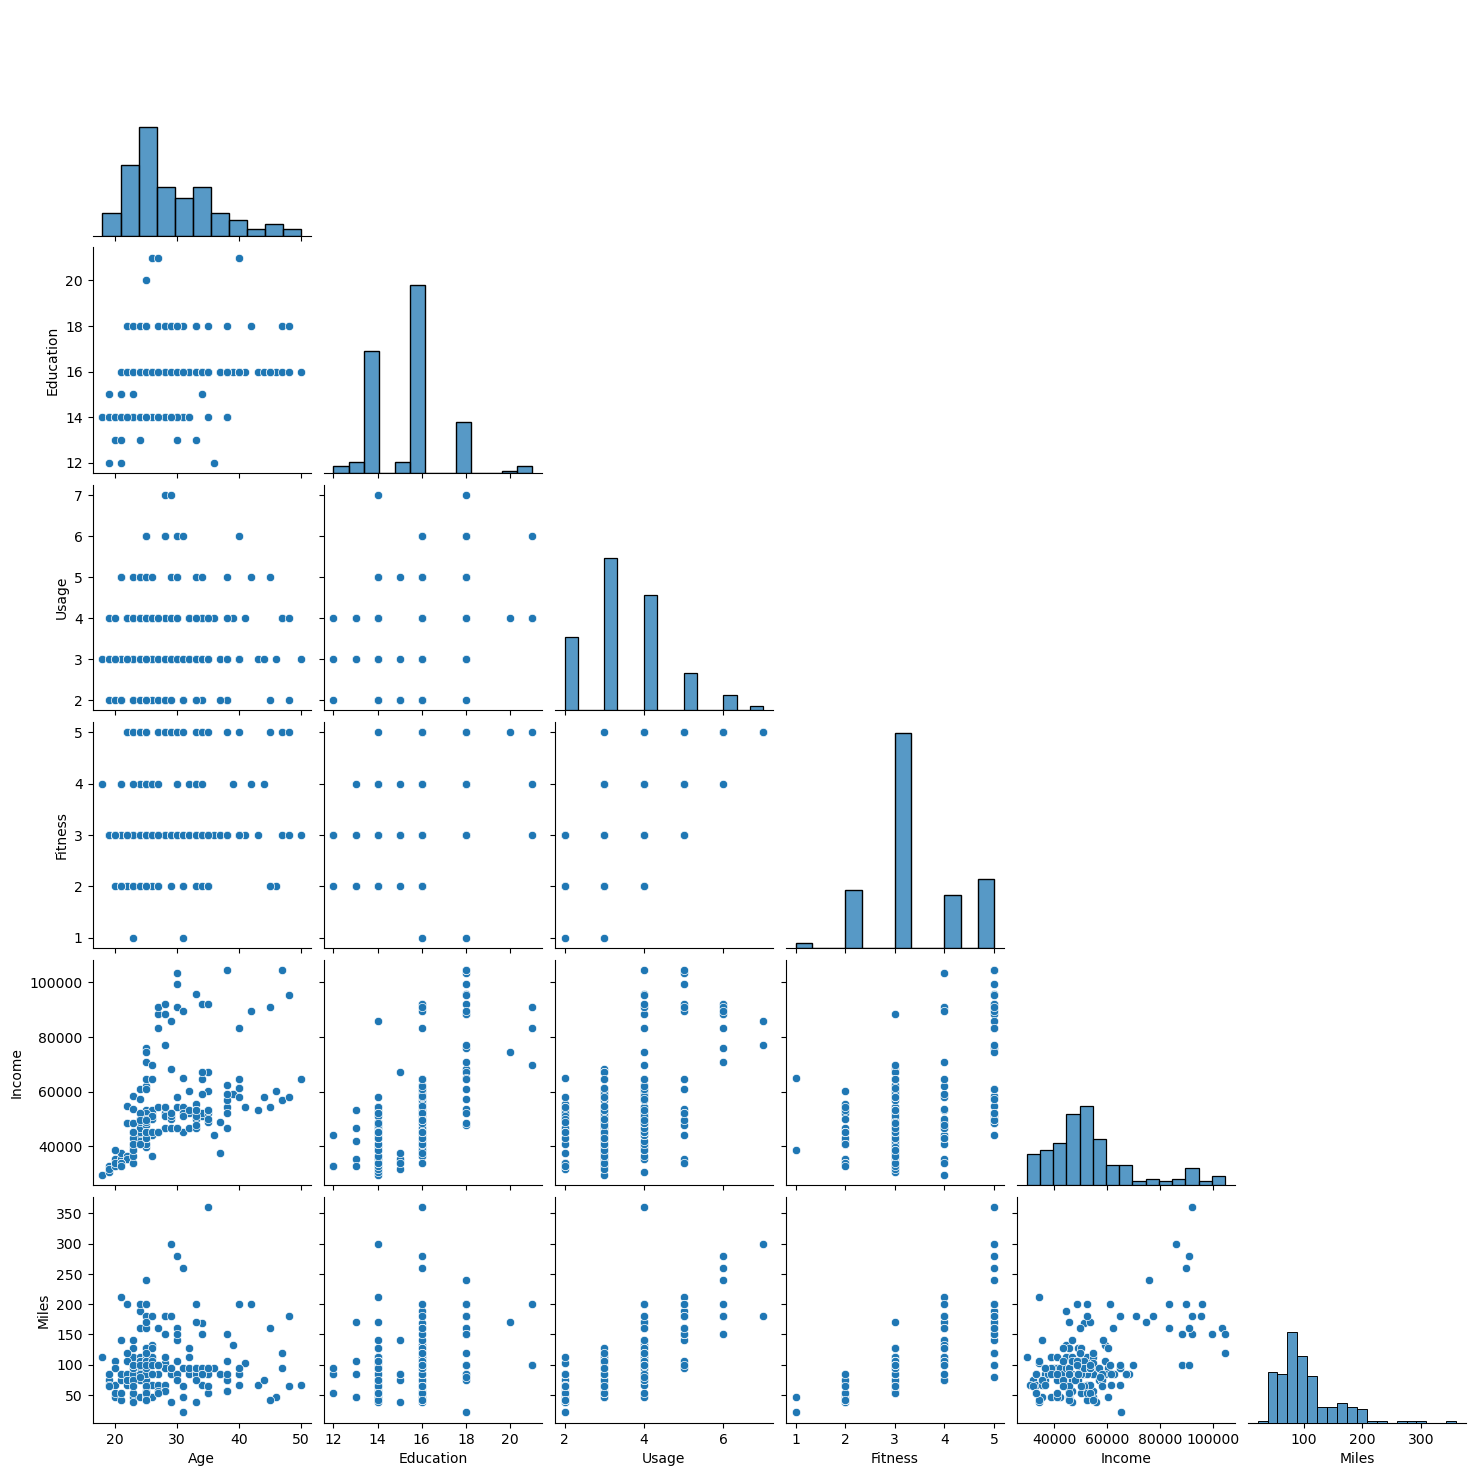

In [17]:
sns.pairplot(data[numeric_columns], corner=True)
plt.show();

---

<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:black;"> Age vs Income

**Relationship between Income and Age with Gender**

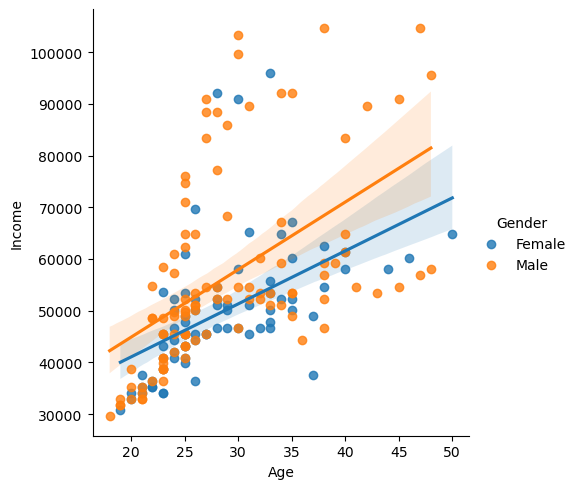

In [18]:
sns.lmplot(data=data, x="Age", y="Income", hue = "Gender")
plt.show();

**Observations**
* Male customers earned more income Female customers.

**Relationship between Income and Age with Product**

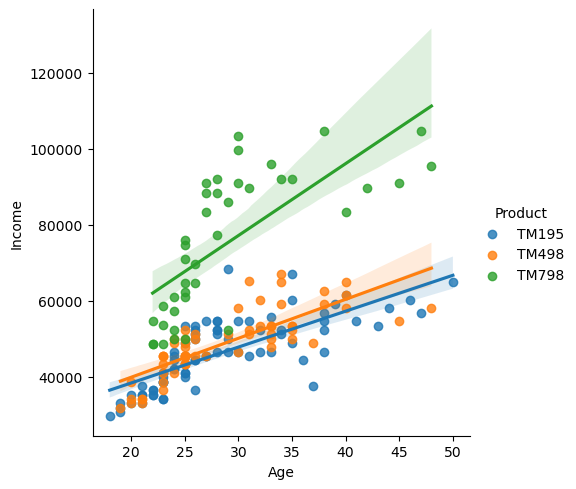

In [19]:
sns.lmplot(data=data, x="Age", y="Income", hue = "Product")
plt.show();

**Observations**
* Customers who earned more purchased the `TM798` model 

 ---

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:black;">Variable Exploration

<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:black;">Categorical Variable Exploration

**Product by Gender**

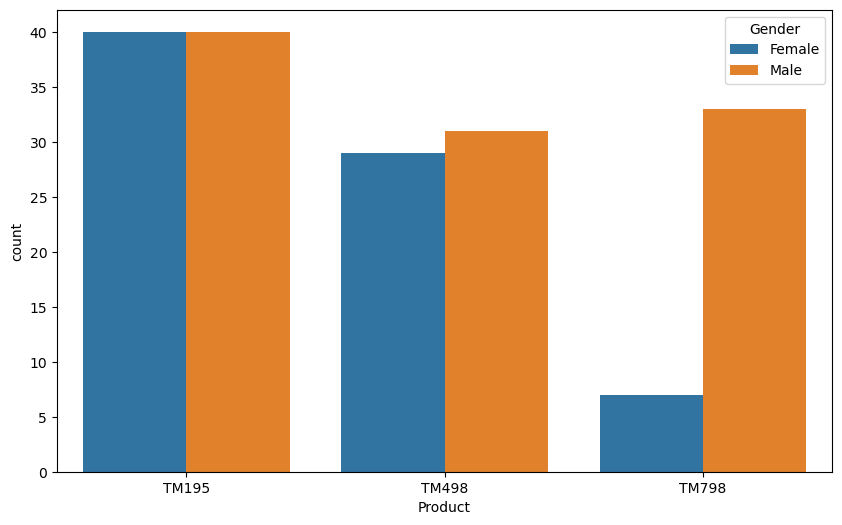

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Product", data=data, hue="Gender")
plt.show()

**Observations**
* The customers who purchase `TM195` are equally distributed between Male and Female
* Male customers significantly prefer the `TM798` model to Female customers. 
* Male customers purchased slightly more `TM498` than Females.

**Product by Marital Status**

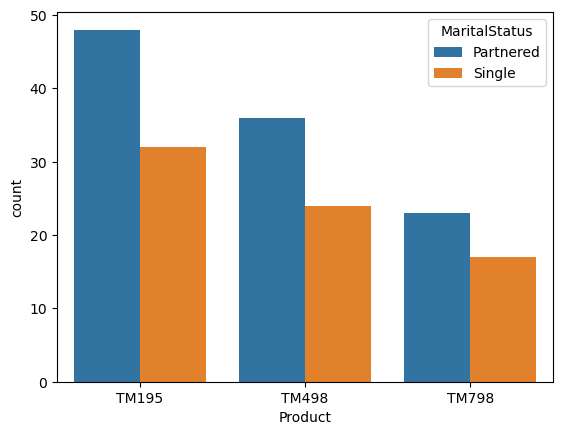

In [21]:
sns.countplot(x="Product",data=data, hue="MaritalStatus")
plt.show();

---

<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:black;">Ordinal Variable Exploration

**Education by Product**

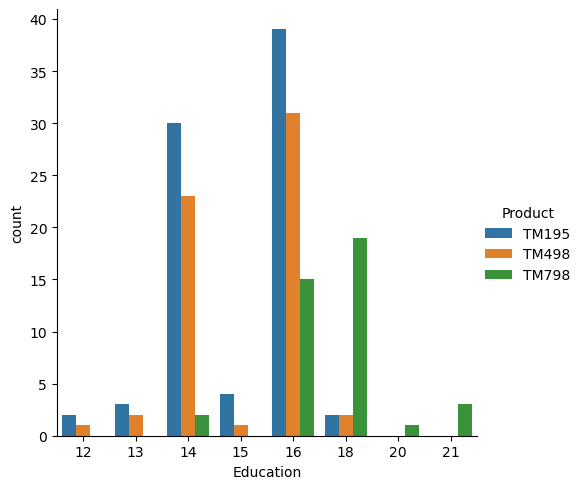

In [22]:
sns.catplot(x="Education", hue="Product",kind="count",data=data)
plt.show();

**Observations**
* Customers with more than 16 years of Education preferred the `TM798` model
* Customers at the around the median and mean age purchased the `TM195` model
* The `TM195` model was highly preferred by customers who had at most 16 years of Education.

**Education by Gender**

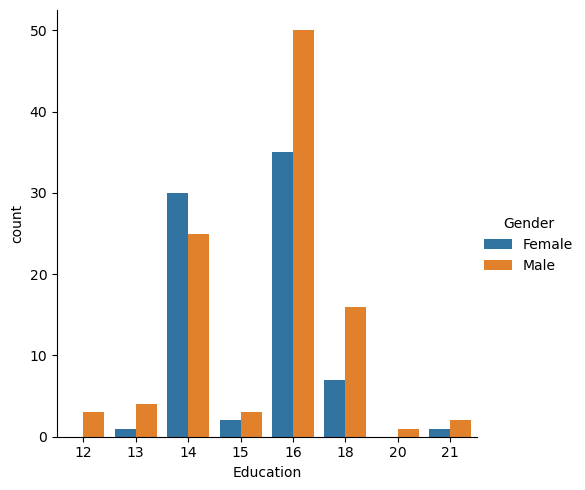

In [23]:
sns.catplot(x="Education", hue="Gender",kind="count",data=data)
plt.show();

**Education by Marital Status**

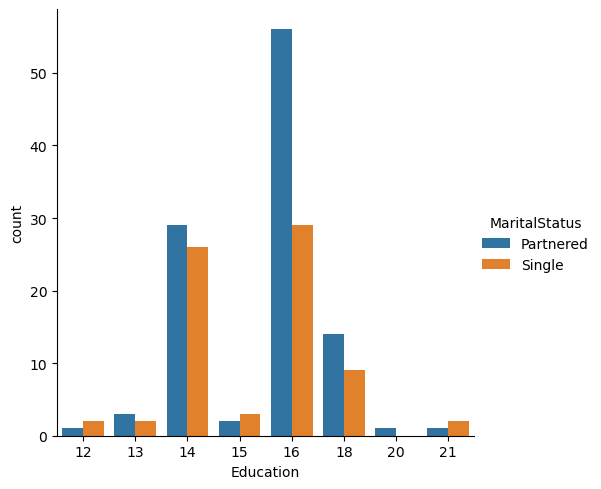

In [24]:
sns.catplot(x="Education", hue="MaritalStatus",kind="count",data=data)
plt.show();

**Usage by Product**

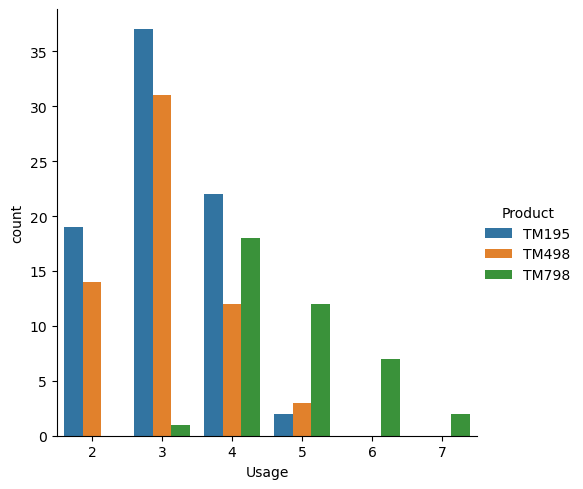

In [25]:
sns.catplot(x="Usage", hue="Product",kind="count",data=data)
plt.show()

**Observations**
* Customers who purchased the `TM195` and `TM498` models expect to use their treadmills at least twice per week and no more than 5 times per week.
* Most of these customers predict to use their treadmill 3 times per week
* The customers who purchased the `TM798` model expect to use the treadmill at least 3 times per week.

**Usage by Gender**

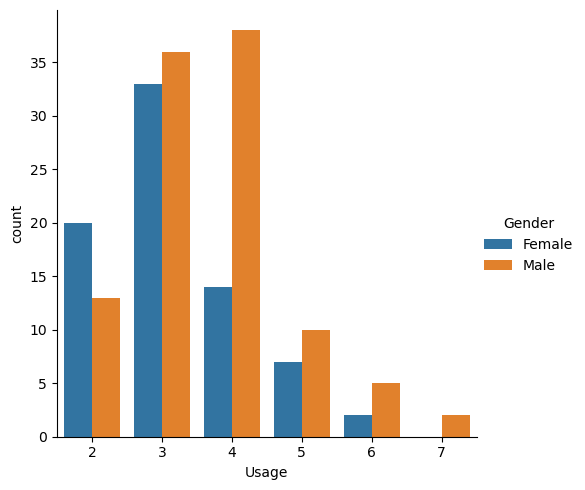

In [26]:
sns.catplot(x="Usage", hue="Gender",kind="count",data=data)
plt.show();

**Observations**
* Most of the female customers plan to use their treadmill 3 times per week
* Most of the male customers plan to use their treadmill 4 times per week.
* Male customers use their treadmill at a higher frequency per week

**Usage by Marital Status**

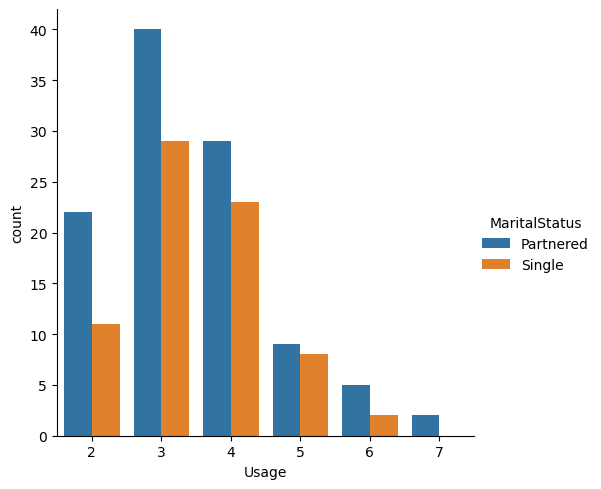

In [27]:
sns.catplot(x="Usage", hue="MaritalStatus",kind="count",data=data)
plt.show();

**Observations***
* Customers who live in partnered relationships plan to use their treadmills more than single customers

**Fitess by Product**

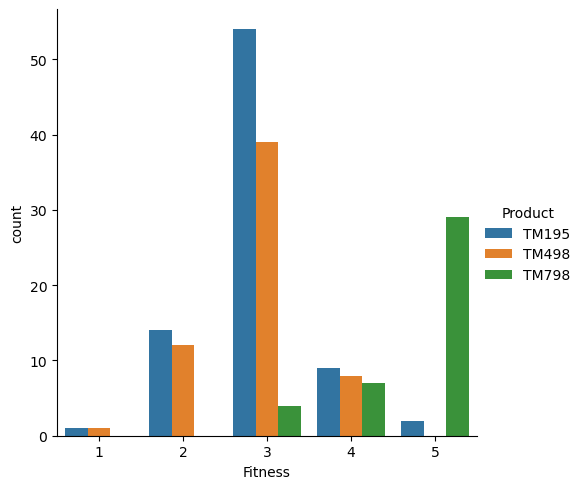

In [28]:
sns.catplot(x="Fitness", hue="Product",kind="count",data=data)
plt.show();

**Observations**
* Customers who purchased the `TM195` and `TM498` treadmills ranked their fitness as average on the 1-5 scale
* Customers who ranked themselves as being fitter favoured the `TM798` model.

**Fitess by Gender**

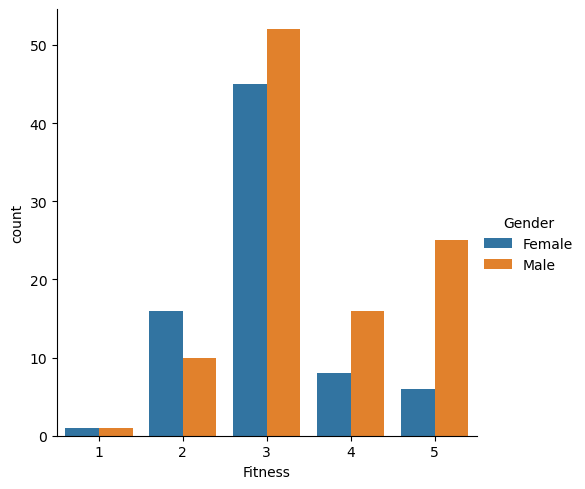

In [29]:
sns.catplot(x="Fitness", hue="Gender",kind="count",data=data)
plt.show();

**Observations**
* The `Male` customers ranked themselves fitter compared to `Female` customers

**Fitess by MaritalStatus**

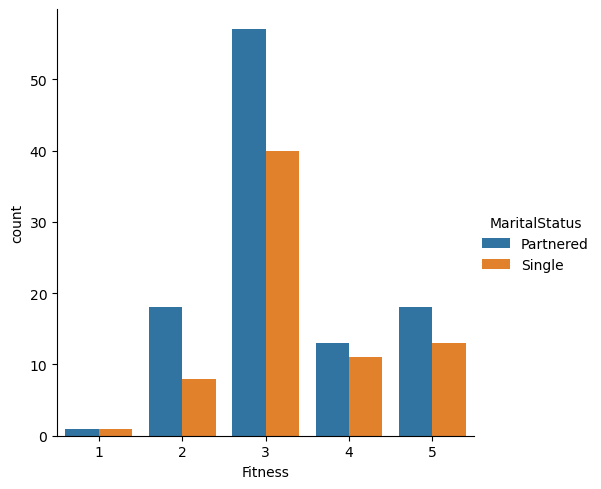

In [30]:
sns.catplot(x="Fitness", hue="MaritalStatus",kind="count",data=data)
plt.show();

**Observations**
* The customers in `Partnered` relationships ranked themselves fitter to their `Single`counterparts.

---

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:blue;">Continuous Variable Exploration

**Product by Age**

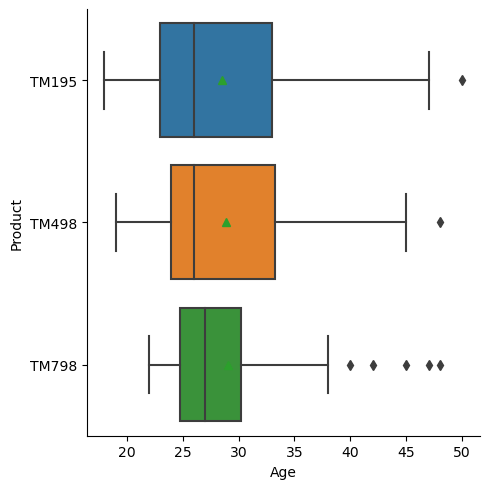

In [31]:
sns.catplot(x="Age", y="Product", kind="box", data=data, showmeans=True)
plt.show();

**Observations**
* The Age range distribution of all customers are heavily right skewed.
* The `TM195` Customers Age range was greater than both the `TM498` and `TM798`. This indicated the `TM195` is popular choice.
* The `TM798` customers had the smallest Age range with the most outliers. This indicates most of the customers are young adults.

**Product by Age with Gender split**

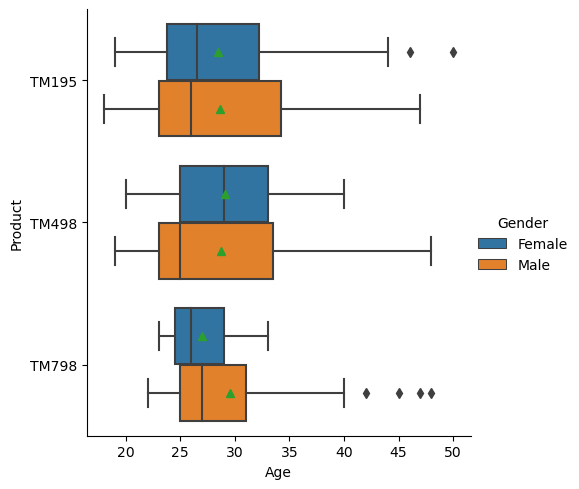

In [32]:
sns.catplot(x="Age", y="Product", kind="box", data=data, showmeans=True, hue="Gender")
plt.show();

**Observations**
* The distribution of Female customers who purchased the `TM498` resembles a normal distribution
* Male customers who purchased `TM798` spanned a wider age range than the Female customers.
* The Age ranges of the Female customers across each model were less than the Males.

**Product by Age with Marital Status split**

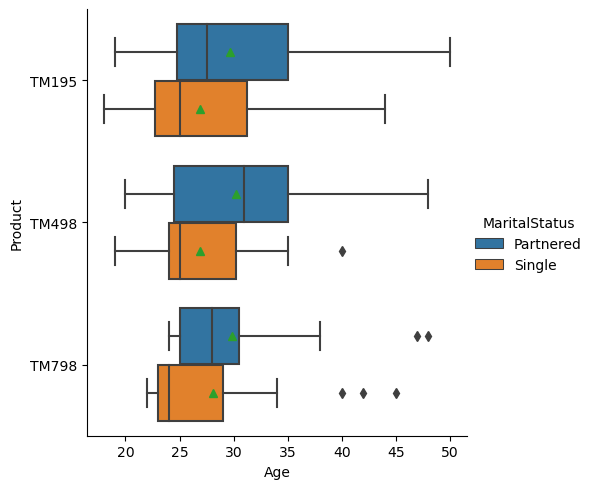

In [33]:
sns.catplot(x="Age", y="Product", kind="box", data=data, showmeans=True, hue="MaritalStatus")
plt.show();

**Observations**
* The mean Age of Partnered customers were greater than the Single customers across each model
* The Partnered customers accounted for older customers across each model.

**Product by Income**

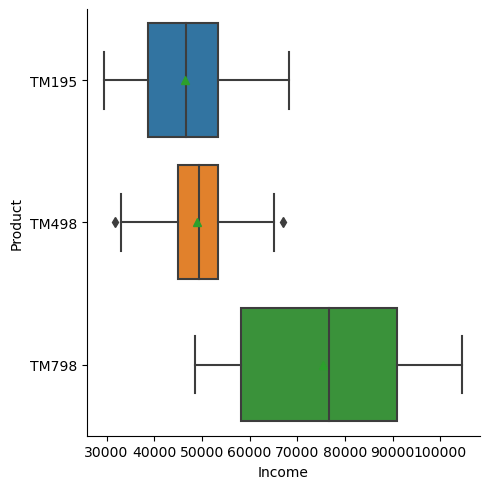

In [34]:
sns.catplot(x="Income", y="Product", kind="box", data=data, showmeans=True)
plt.show();

**Observations**
* The TM798 customers the highest income earners

**Product by Income with Gender split**

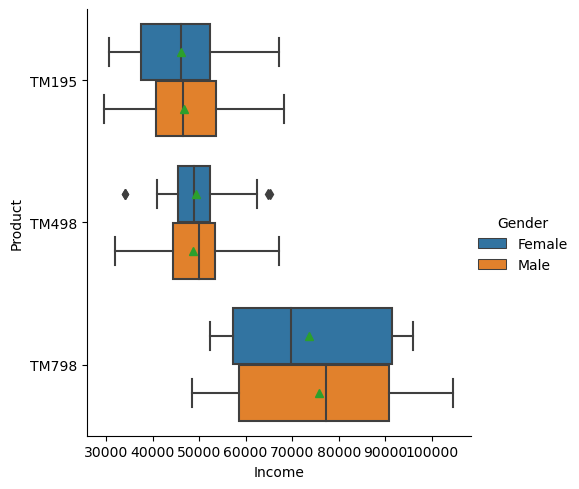

In [35]:
sns.catplot(x="Income", y="Product", kind="box", data=data, showmeans=True, hue="Gender")
plt.show();

**Observations**
* Male customers who bought the TM798 model earned more and a wider range of income compared to the Female customers.

**Product by Income with Marital Status split**

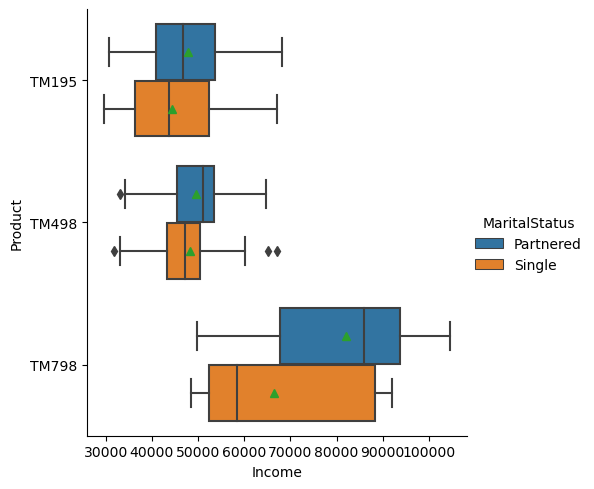

In [36]:
sns.catplot(x="Income", y="Product", kind="box", data=data, showmeans=True, hue="MaritalStatus")
plt.show();

**Observations**
* Partnered Customers earned higher average income compared to the Single customers.

**Product by Miles**

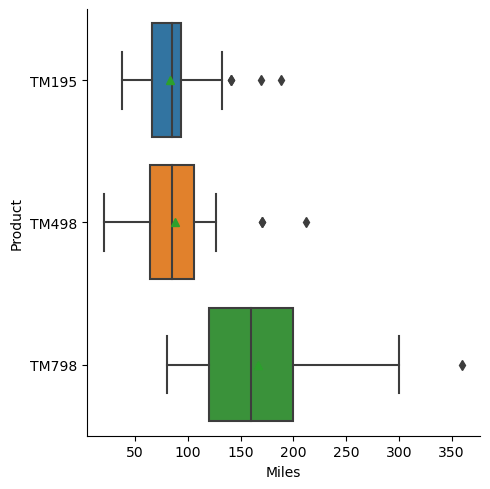

In [37]:
sns.catplot(x="Miles", y="Product", kind="box", data=data, showmeans=True)
plt.show();

**Observations**
* Customers who purchased the `TM798` model expected to run more miles and in some cases up to twice the amount of miles.

**Product by Miles with Gender split**

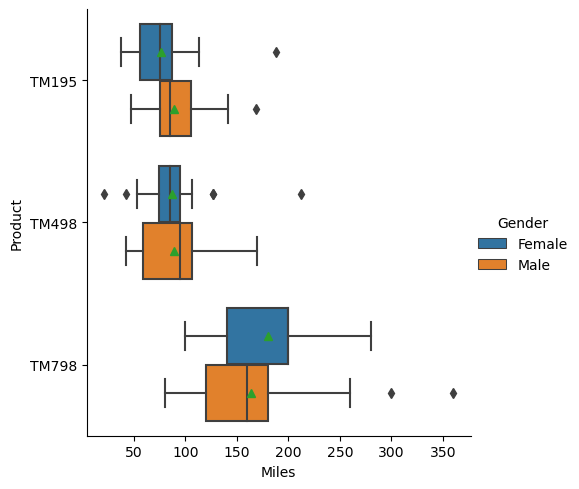

In [38]:
sns.catplot(x="Miles", y="Product", kind="box", data=data, showmeans=True, hue="Gender")
plt.show();

**Observations**
* Female customers who bought the `TM798` model expect to run a higher average number of miles than the Male customers.

**Product by Miles with Marital Status split**

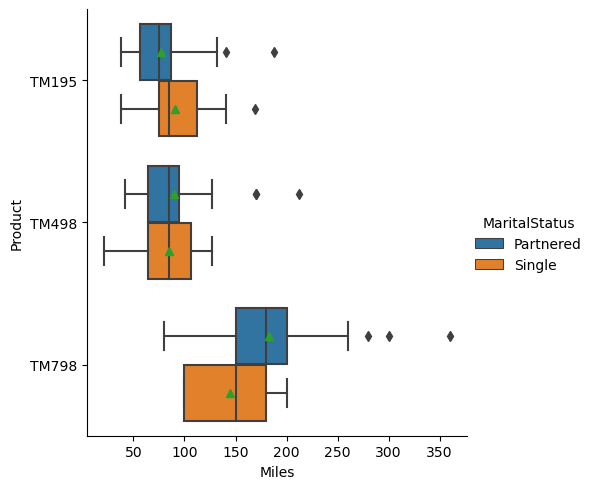

In [39]:
sns.catplot(x="Miles", y="Product", kind="box", data=data, showmeans=True, hue="MaritalStatus")
plt.show();

**Observations**
* Customers who bought the TM798 model and living in a Partnered relationship expect to up to maximum of 250 miles per week.

---